In [ ]:
import tensorflow as tf

# Check GPU availability
if tf.test.gpu_device_name():
    print('GPU device found')
else:
    print("No GPU found")

No GPU found


### 1. Download the X and y data using the load function from the numpy package

In [ ]:
import numpy as np
y = np.load("/content/sample_data/y.npy")
y

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
y.shape

(10000, 2)

In [ ]:
X = np.load("/content/sample_data/X.npy" )
#X = np.load("C:\Users\camil\Neural Networks & Deep Learn\X.npy")
X

array([[[[3.77194226e-01, 3.18239152e-01, 2.43005693e-01],
         [3.86557311e-01, 3.25899810e-01, 2.41303325e-01],
         [3.94913971e-01, 3.32554132e-01, 2.38594592e-01],
         ...,
         [6.36720181e-01, 5.78422546e-01, 5.01064241e-01],
         [9.66353238e-01, 9.32092905e-01, 7.77911186e-01],
         [9.27930713e-01, 9.11135137e-01, 7.35995650e-01]],

        [[3.65406930e-01, 3.06583405e-01, 2.17322022e-01],
         [3.67960483e-01, 3.09136957e-01, 2.23280311e-01],
         [3.64960492e-01, 3.06136966e-01, 2.23685071e-01],
         ...,
         [7.29743361e-01, 6.77892923e-01, 5.79351068e-01],
         [9.56221998e-01, 9.26566720e-01, 7.66858935e-01],
         [9.23392713e-01, 9.05609012e-01, 7.28439212e-01]],

        [[3.68225902e-01, 3.09402376e-01, 2.19206288e-01],
         [3.67374718e-01, 3.08551192e-01, 2.18355104e-01],
         [3.60895127e-01, 3.02071601e-01, 2.11875528e-01],
         ...,
         [6.44429386e-01, 5.97007215e-01, 4.26704407e-01],
         [

In [ ]:
X.shape

(10000, 50, 50, 3)

### 2. Plot 8 images and show their labels

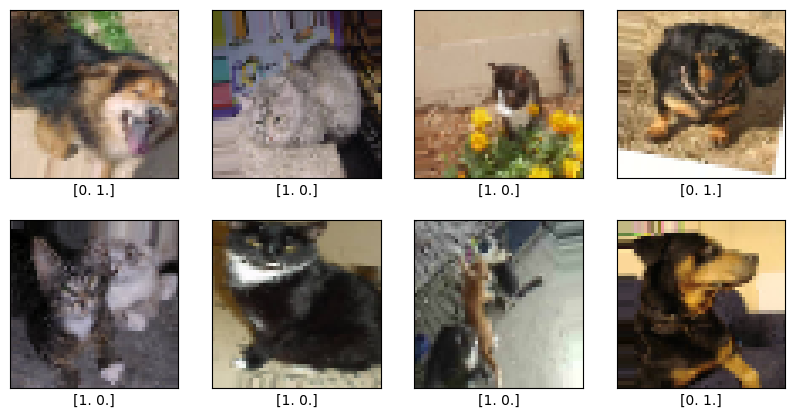

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

plt.figure(figsize=(10, 5))
random_inds = np.random.choice(len(X), 8, replace=False)

for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(X[image_ind]), cmap=plt.cm.binary)
    # Use the labels directly as they are
    plt.xlabel(str(y[image_ind]))

plt.show()

Our targets : cat and dog

-> tuple : (0,1) ou (1,0)

### 3. Split the data on train and test set (12 %)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)

print('x_train : ',X_train.shape, 'y_train : ',y_train.shape)
print('x_test  : ',X_test.shape,  'y_test  : ',y_test.shape)

x_train :  (8800, 50, 50, 3) y_train :  (8800, 2)
x_test  :  (1200, 50, 50, 3) y_test  :  (1200, 2)


### 4. Define a first learning model without the CNN cell with 4 hidden dense layers and give the validation and test scores.

In [ ]:
import tensorflow as tf
num_classes = y.shape[1]  # equal to 2

def build_fc_model():
    fc_model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(50, 50, 3)),  # Flatten the input images

        # Adding four hidden dense layers as requested
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(64, activation=tf.nn.relu),

        tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)  # Softmax for probabilities
    ])
    return fc_model

model = build_fc_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 7500)              0         
                                                                 
 dense_30 (Dense)            (None, 512)               3840512   
                                                                 
 dense_31 (Dense)            (None, 256)               131328    
                                                                 
 dense_32 (Dense)            (None, 128)               32896     
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 2)                 130       
                                                                 
Total params: 4013122 (15.31 MB)
Trainable params: 40

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
BATCH_SIZE = 32
EPOCHS = 50

# Training the model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=(X_test, y_test))

Epoch 1/50
275/275 [==============================] - 3s 6ms/step - loss: 0.7625 - accuracy: 0.5222 - val_loss: 0.7172 - val_accuracy: 0.4992
Epoch 2/50
275/275 [==============================] - 1s 5ms/step - loss: 0.6863 - accuracy: 0.5537 - val_loss: 0.6786 - val_accuracy: 0.5733
Epoch 3/50
275/275 [==============================] - 1s 5ms/step - loss: 0.6710 - accuracy: 0.5892 - val_loss: 0.6750 - val_accuracy: 0.5550
Epoch 4/50
275/275 [==============================] - 1s 5ms/step - loss: 0.6672 - accuracy: 0.5932 - val_loss: 0.6690 - val_accuracy: 0.5850
Epoch 5/50
275/275 [==============================] - 2s 6ms/step - loss: 0.6605 - accuracy: 0.5991 - val_loss: 0.6775 - val_accuracy: 0.5583
Epoch 6/50
275/275 [==============================] - 3s 10ms/step - loss: 0.6597 - accuracy: 0.6009 - val_loss: 0.6723 - val_accuracy: 0.5917
Epoch 7/50
275/275 [==============================] - 1s 5ms/step - loss: 0.6567 - accuracy: 0.5986 - val_loss: 0.6731 - val_accuracy: 0.5892
Epoch

In [ ]:
# Evaluating the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

38/38 - 0s - loss: 0.8039 - accuracy: 0.5917 - 216ms/epoch - 6ms/step
Test accuracy: 0.5916666388511658, Test loss: 0.8039310574531555


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Model configuration
input_shape = (50, 50, 3)
num_classes = 2

model = Sequential([
    Flatten(input_shape=input_shape),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Training configuration
BATCH_SIZE = 64
EPOCHS = 50
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}, Test loss: {test_loss}')

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 7500)              0         
                                                                 
 dense_35 (Dense)            (None, 512)               3840512   
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_36 (Dense)            (None, 256)               131328    
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 128)               32896     
                                                                 
 dropout_13 (Dropout)        (None, 128)             

### 5. Write a function for plotting the predicted labels. The result should indicate the probability of the predicted label with blue color if the prediction is correct otherwise in the red color.

38/38 [==============================] - 0s 2ms/step


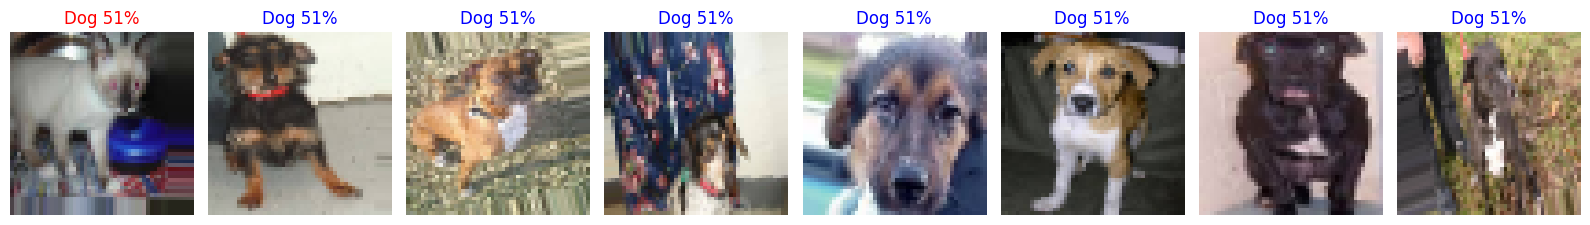

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image_predictions(images, true_labels, predictions, class_names):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(2 * num_images, 3), squeeze=False)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = np.argmax(true_labels[i])
        color = 'blue' if predicted_label == true_label else 'red'
        ax.set_title(f"{class_names[predicted_label]} {100*np.max(predictions[i]):2.0f}%", color=color)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


predictions = model.predict(X_test)
class_names = ['Cat', 'Dog']
images_to_plot = 8
plot_image_predictions(X_test[:images_to_plot], y_test[:images_to_plot], predictions[:images_to_plot], class_names)


### 6. Train a second model using the following CNN structure Conv pool conv pool conv conv pool dense dense.
### 7. Compute the validation and test scores.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [ ]:
import tensorflow as tf

def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', input_shape=(50,50,3)),
        tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),


        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),


        tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'),


        tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),


        tf.keras.layers.Flatten(),


        tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),


        tf.keras.layers.Dense(2, activation='softmax'),
    ])

    return cnn_model



cnn_model = build_cnn_model()
cnn_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 11, 11, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 7, 7, 128)       

In [ ]:
learning_rate = 0.001
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='auto', patience=5, verbose=1)


cnn_model.fit(X_train, y_train, epochs=50,
              batch_size=32, validation_data=(X_test, y_test),
              callbacks=[es])


test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=2)

print(f'Test accuracy: {test_accuracy}, Test loss: {test_loss}')

Epoch 1/50
275/275 [==============================] - 4s 7ms/step - loss: 0.7119 - accuracy: 0.5561 - val_loss: 0.6891 - val_accuracy: 0.5900
Epoch 2/50
275/275 [==============================] - 2s 6ms/step - loss: 0.6333 - accuracy: 0.6428 - val_loss: 0.6271 - val_accuracy: 0.6458
Epoch 3/50
275/275 [==============================] - 2s 7ms/step - loss: 0.5907 - accuracy: 0.6909 - val_loss: 0.5951 - val_accuracy: 0.6675
Epoch 4/50
275/275 [==============================] - 2s 7ms/step - loss: 0.5547 - accuracy: 0.7120 - val_loss: 0.5657 - val_accuracy: 0.7008
Epoch 5/50
275/275 [==============================] - 2s 6ms/step - loss: 0.5151 - accuracy: 0.7433 - val_loss: 0.5858 - val_accuracy: 0.7058
Epoch 6/50
275/275 [==============================] - 2s 6ms/step - loss: 0.4753 - accuracy: 0.7663 - val_loss: 0.5778 - val_accuracy: 0.7150
Epoch 7/50
275/275 [==============================] - 2s 6ms/step - loss: 0.4301 - accuracy: 0.7966 - val_loss: 0.6050 - val_accuracy: 0.7292
Epoch 

### 8. Train one transfert learning approaches from the Keras API (not the same seen during the course)

### With MobileNetV2 :

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Chargement du modèle MobileNetV2 pré-entraîné sans la partie classification
base_model = tf.keras.applications.MobileNetV2(input_shape=(50,50,3),
                                               include_top=False,
                                               weights='imagenet')

# Congélation des couches du modèle de base pour ne pas les réentraîner
base_model.trainable = False


model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')  #2 classes
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


BATCH_SIZE = 32
EPOCHS = 50
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=BATCH_SIZE, epochs=EPOCHS)


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}, Test loss: {test_loss}')


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 2, 2, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_7  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 batch_normalization_7 (Bat  (None, 1280)              5120      
 chNormalization)                                                
                                                                 
 dense_42 (Dense)            (None, 256)               327936    
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                     

### 8. With EfficientNetB0 :

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0

# Chargement du modèle EfficientNetB0 pré-entraîné sans la partie classification
base_model = EfficientNetB0(input_shape=(50, 50, 3),
                            include_top=False,
                            weights='imagenet')

# Congélation des couches du modèle de base pour ne pas les réentraîner
base_model.trainable = False


model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


BATCH_SIZE = 32
EPOCHS = 1
history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_test, y_test))


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 2, 2, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 4378021 (16.70 MB)
Trainable params: 328

### 9. Put the best test scores of the three models in a unique table and print it

In [ ]:
import pandas as pd

fully_connected_test_loss =
fully_connected_test_accuracy =

cnn_test_loss =
cnn_test_accuracy =


transfer_learning_test_loss =
transfer_learning_accuracy =

scores = {
    'Model': ['fully connected neural network ', 'CNN', 'Transfer Learning : MobileNetV2'],
    'Test Loss': [fully_connected_test_loss, cnn_test_loss, transfer_learning_test_loss],
    'Test Accuracy': [fully_connected_test_accuracy, cnn_test_accuracy, transfer_learning_accuracy]
}

scores_df = pd.DataFrame(scores)
scores_df

 ### 10. Train a CNN ***denoising autoencoder*** on the data and illustrate your model using some images. To constract the noisy image, use a normal distribution with mean equal to 01 and variance  equal to 03. Try to reduce the inial size of images at least by factor 10 (compute this rate and write it in a comment)

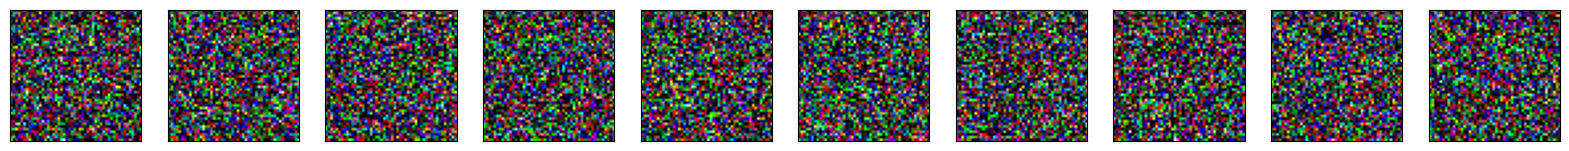

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model


x_train = X_train.astype('float32') / 255.
x_test = X_test.astype('float32') / 255.

# Ajout d'un bruit aux images selon la distribution normale spécifiée
noise_mean = 0.1
noise_variance = 0.3
x_train_noisy = x_train + np.random.normal(noise_mean, np.sqrt(noise_variance), x_train.shape)
x_test_noisy = x_test + np.random.normal(noise_mean, np.sqrt(noise_variance), x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Affichage des images bruitées pour vérification
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(50, 50, 3))  # Ajustez cette ligne si la forme de vos images est différente
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


input_img = Input(shape=(50, 50, 3))  # Pour des images 50x50 avec 3 canaux

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

10. Train a CNN denoising autoencoder on the data and illustrate your model using some images. To constract the noisy image, use a normal distribution with mean equal to 01 and variance equal to 03. Try to reduce the inial size of images at least by factor 10 (compute this rate and write it in a comment)

In [ ]:
import numpy as np

# normalization in the range [0, 1]

x_train = X_train.astype('float32') / 255
x_test = X_test.astype('float32') / 255

noise_factor = 0.5
mean = 0.1
variance = 0.3
sigma = variance**0.5

# Add noise to the images
X_noisy = X + noise_factor * np.random.normal(loc=mean, scale=sigma, size=X.shape)
X_noisy = np.clip(X_noisy, 0., 1.)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 25, 25, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 16)        2320

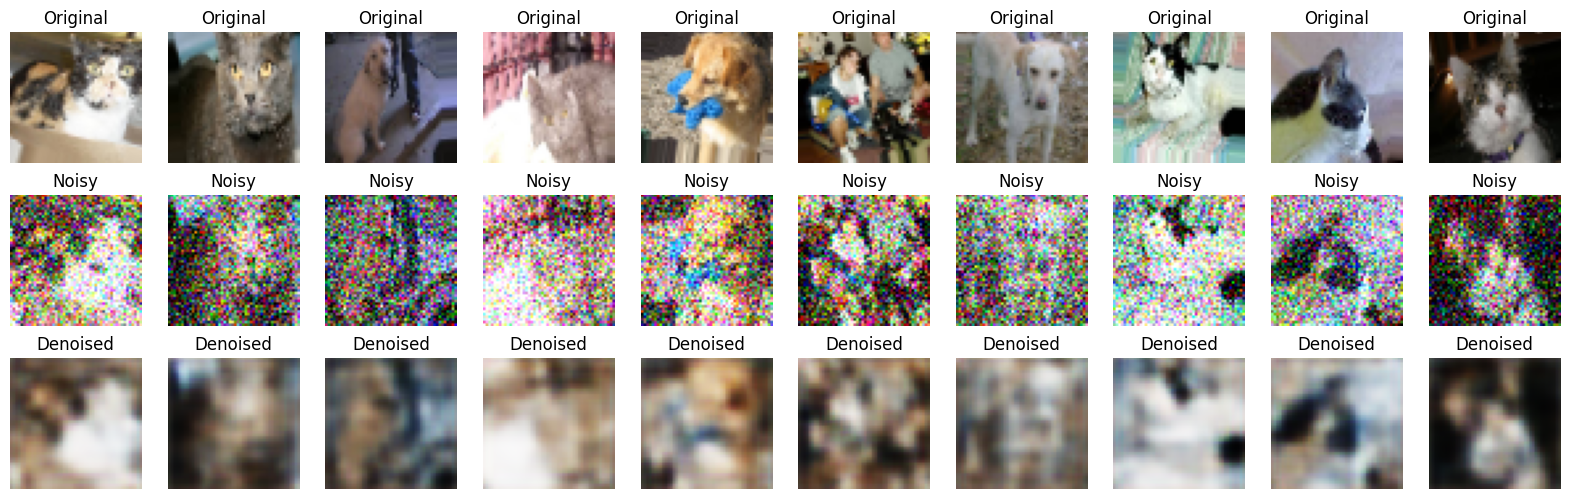

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Cropping2D
from tensorflow.keras.models import Model

input_img = Input(shape=(50, 50, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Optionnel : Ajustement de la taille via Cropping
decoded = Cropping2D(cropping=((1, 1), (1, 1)))(decoded)  # Ajuste la sortie à 50x50

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()




autoencoder.fit(X_noisy, X, epochs=5, batch_size=256, shuffle=True, validation_split=0.1)


import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(X_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X[i])
    plt.title("Original")
    plt.axis('off')

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i])
    plt.title("Denoised")
    plt.axis('off')

plt.show()